# Data prepare

In [1]:
import pandas as pd
import numpy as np
import re

#### Read data and drop item withou salary

In [2]:
f=open("C:/Users/Leo/Documents/github_repositories/scrapy_foundamental/job_china/job1.csv")
df=pd.read_csv(f)
df["job"]=df.index
df.columns=[ 'Campany', 'Salary', 'Work_Position', 'Post_time',
       'Require', 'Describe',"type",'job']
# relapce nan
df=df.replace('[]',np.nan)
# drop duplicate item
df.drop_duplicates(inplace=True)
# drop items witout salary
df.drop(df[df['Salary'].isnull()].index.tolist(),inplace=True)
# re range the index
df.index=range(len(df))

In [3]:
df.head(3)

,Campany,Salary,Work_Position,Post_time,Require,Describe,type,job
0,翼集分电子商务（上海）有限公司,15-20万/年,北京-西城区,01-12,['北京-西城区\xa0\xa0|\xa0\xa03-4年经验\xa0\xa0|\xa0\x...,"['五险一金', '补充公积金', '定期体检', '餐饮补贴', '绩效奖金', '年终奖...",['\r\n\t\t\t\t\t\t\t\t\t\t市场/营销/拓展主管\t\t\t\t\t...,方案经理
1,Hewlett Packard Enterprise,1.5-2.5万/月,北京-朝阳区,01-12,['北京-朝阳区\xa0\xa0|\xa0\xa0无工作经验\xa0\xa0|\xa0\xa...,NaN,['\r\n\t\t\t\t\t\t\t\t\t\t高级软件工程师\t\t\t\t\t\t\...,高级软件工程师 - Software Development Engineer
2,英达特信息技术（上海）有限公司,1-1.8万/月,北京-朝阳区,01-12,['北京-朝阳区\xa0\xa0|\xa0\xa03-4年经验\xa0\xa0|\xa0\x...,"['补充医疗保险', '五险一金', '员工旅游', '交通补贴', '通讯补贴', '绩效...",['\r\n\t\t\t\t\t\t\t\t\t\t大客户销售\t\t\t\t\t\t\t\...,Business Development Manager of North China


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74660 entries, 0 to 74659
Data columns (total 8 columns):
Campany          74660 non-null object
Salary           74660 non-null object
Work_Position    74660 non-null object
Post_time        74660 non-null object
Require          73267 non-null object
Describe         61691 non-null object
type             73267 non-null object
job              74660 non-null object
dtypes: object(8)
memory usage: 4.6+ MB


#### 51788 different jobs founded

In [5]:
df["job"].value_counts().describe()

count    51788.000000
mean         1.441647
std          3.262597
min          1.000000
25%          1.000000
50%          1.000000
75%          1.000000
max        241.000000
Name: job, dtype: float64

### dealing with salary first

In [6]:
salary_first=df["Salary"].str.split('/',expand=True)[0].str.split('-',expand=True)[0]
salary_last=df["Salary"].str.split('/',expand=True)[0].str.split('-',expand=True)[1]

In [7]:
def is_number(num):
    try: 
        float(num)
        return float(num)
    except ValueError: 
        return np.nan

#### Extract useful information to compute monthly salary

In [8]:
df["salary_first"]=[is_number(x) for x in salary_first]
df["salary_second"]=[is_number(re.findall(u"[^\u4e00-\u9fa5]+",x)[0]) if x else x for x in salary_last]
df["salary_unit"]=[re.findall(u"[\u4e00-\u9fa5]+",x)[0] if x else x for x in salary_last]
df["salary_time"]=df["Salary"].str.split('/',expand=True)[1]

In [9]:
df["salary_unit"].value_counts()

万    44044
千    29895
Name: salary_unit, dtype: int64

In [10]:
df["salary_unit"]=df["salary_unit"].replace("万",10000)
df["salary_unit"]=df["salary_unit"].replace("千",1000)

In [11]:
df["salary_time"].value_counts()

月     71525
年      2509
天       504
小时      122
Name: salary_time, dtype: int64

#### compute work_time into same scale, month

In [12]:
df["salary_time"]=df["salary_time"].replace("月",1)
df["salary_time"]=df["salary_time"].replace("年",0.083)
df["salary_time"]=df["salary_time"].replace("天",30)
df["salary_time"]=df["salary_time"].replace("小时",240)

#### Drop the items without useful infomations

In [13]:
df.drop(df[df['salary_first'].isnull()].index.tolist(),inplace=True)
df.index=range(len(df))
df.drop(df[df['salary_time'].isnull()].index.tolist(),inplace=True)
df.index=range(len(df))

#### Compute salary

In [14]:
df["salary_low"]=df["salary_first"]*df["salary_unit"]*df["salary_time"]
df["salary_high"]=df["salary_second"]*df["salary_unit"]*df["salary_time"]
df["salary_mean"]=(df["salary_low"]+df["salary_high"])/2

#### Drop original mass columns

In [15]:
df=df.drop(["Salary","salary_first","salary_second","salary_unit","salary_time"],axis=1)

In [16]:
df["salary_variance"]=df["salary_high"]-df["salary_low"]

In [17]:
df.head(2)

,Campany,Work_Position,Post_time,Require,Describe,type,job,salary_low,salary_high,salary_mean,salary_variance
0,翼集分电子商务（上海）有限公司,北京-西城区,01-12,['北京-西城区\xa0\xa0|\xa0\xa03-4年经验\xa0\xa0|\xa0\x...,"['五险一金', '补充公积金', '定期体检', '餐饮补贴', '绩效奖金', '年终奖...",['\r\n\t\t\t\t\t\t\t\t\t\t市场/营销/拓展主管\t\t\t\t\t...,方案经理,12450.0,16600.0,14525.0,4150.0
1,Hewlett Packard Enterprise,北京-朝阳区,01-12,['北京-朝阳区\xa0\xa0|\xa0\xa0无工作经验\xa0\xa0|\xa0\xa...,NaN,['\r\n\t\t\t\t\t\t\t\t\t\t高级软件工程师\t\t\t\t\t\t\...,高级软件工程师 - Software Development Engineer,15000.0,25000.0,20000.0,10000.0


# Dealing with Require, describe and type

#### extract useful infomation

In [18]:
type_list=",".join([",".join(re.findall(u"[\u4e00-\u9fa5]+",str(x))) 
                    for x in df["type"].tolist()]).split(",")

In [19]:
type_list[:5]

['市场', '营销', '拓展主管', '高级软件工程师', '无线通信工程师']

In [20]:
describe_list=",".join([x.strip().strip("'").strip() 
                        for x in ",".join([str(x).lstrip('[').rstrip(']') 
                                                                        for x in df["Describe"].tolist()]).split(",")]).split(",")

In [21]:
describe_list[:5]

['五险一金', '补充公积金', '定期体检', '餐饮补贴', '绩效奖金']

In [22]:
require_list=",".join([",".join(str(x).lstrip("['").rstrip("']").split("\\xa0\\xa0|\\xa0\\xa0")) for x in df["Require"].tolist()]).split(",")

In [23]:
require_list[:5]

['北京-西城区', '3-4年经验', '本科', '招1人', '01-12发布']

# picture of word

#### Get the words picture for different groups job

In [24]:
from wordcloud import WordCloud

In [25]:
import matplotlib.pyplot as plt  
from wordcloud import WordCloud,STOPWORDS,ImageColorGenerator
%pylab inline

Populating the interactive namespace from numpy and matplotlib


C:\Software\Anaconda3\lib\site-packages\IPython\core\magics\pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


#### Make picture can output Chinese

In [26]:
from PIL import Image
picture = np.array(Image.open("beijing.png"))

In [27]:
font = r'simfang.ttf'

### Work type words picture by different salary group job

#### Delete the words ofen occurs in both groups

In [28]:
stopwords = set(STOPWORDS)
stopwords.add("其他")
stopwords.add("市场")
stopwords.add("营销")

In [29]:
type_txt_high=",".join([",".join(re.findall(u"[\u4e00-\u9fa5]+",str(x))) 
                        for x in df[df["salary_mean"]>20000]["type"].tolist()])

type_txt_low=",".join([",".join(re.findall(u"[\u4e00-\u9fa5]+",str(x))) 
                       for x in df[df["salary_mean"]<=10000]["type"].tolist()])

In [30]:
wordcloud_high = WordCloud(font_path=font,stopwords=stopwords,
                     mask=picture,max_words=200,max_font_size=80,
                      background_color='white',random_state=42,
                     width=3000,height=2000,).generate(type_txt_high)

In [31]:
wordcloud_low = WordCloud(font_path=font,stopwords=stopwords,
                     mask=picture,max_words=200,max_font_size=80,
                      background_color='white',random_state=42,
                     width=3000,height=2000,).generate(type_txt_low)

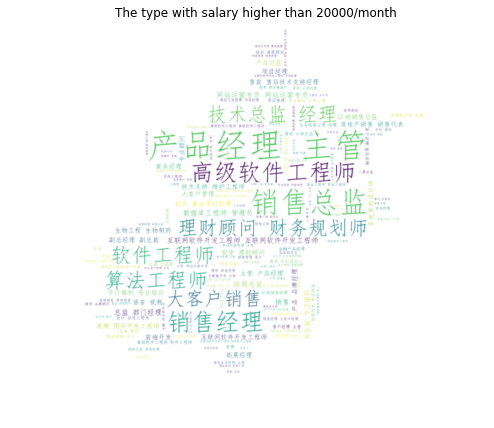

In [32]:
plt.figure(figsize=(8,8))
plt.imshow(wordcloud_high, interpolation='bilinear')
plt.title("The type with salary higher than 20000/month")
plt.axis("off")
plt.savefig("Type_high.png")

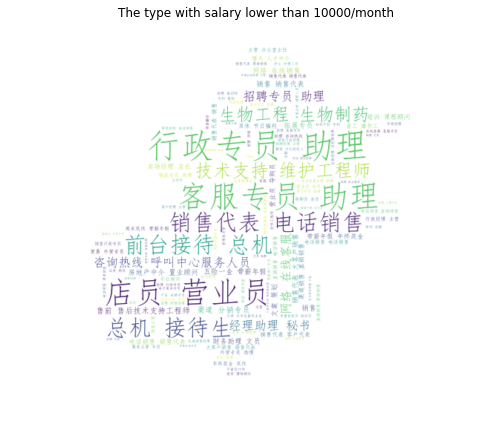

In [33]:
plt.figure(figsize=(8,8))
plt.imshow(wordcloud_low, interpolation='bilinear')
plt.title("The type with salary lower than 10000/month")
plt.axis("off")
plt.savefig("Type_low.png")

#### Work description's words picture by different salary group job

In [34]:
stopwords = set(STOPWORDS)
stopwords.add("nan")
stopwords.add("五险一金")
stopwords.add("交通补贴")
stopwords.add("年终奖金")
stopwords.add("绩效奖金")
stopwords.add("通讯补贴")

In [35]:
describe_txt_high=",".join([x.strip().strip("'").strip() 
                            for x in ",".join([str(x).lstrip('[').rstrip(']') for x in df[df["salary_mean"]>20000]["Describe"].tolist()]).split(",")])

describe_txt_low=",".join([x.strip().strip("'").strip() 
                           for x in ",".join([str(x).lstrip('[').rstrip(']') for x in df[df["salary_mean"]<=10000]["Describe"].tolist()]).split(",")])

In [36]:
describe_high_word = WordCloud(font_path=font,stopwords=stopwords,
                     mask=picture,max_words=200,max_font_size=80,
                      background_color='white',random_state=42,
                     width=3000,height=2000,).generate(describe_txt_high)

In [37]:
describe_low_word = WordCloud(font_path=font,stopwords=stopwords,
                     mask=picture,max_words=200,max_font_size=80,
                      background_color='white',random_state=42,
                     width=3000,height=2000,).generate(describe_txt_low)

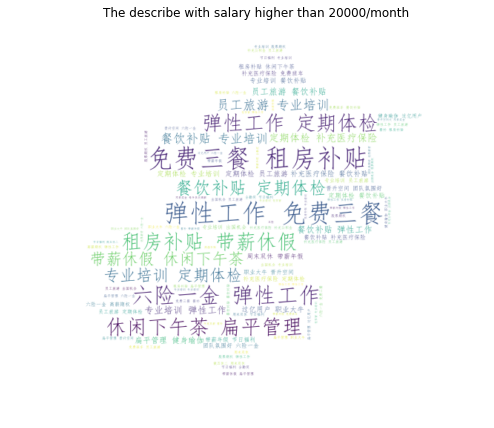

In [38]:
plt.figure(figsize=(8,8))
plt.imshow(describe_high_word, interpolation='bilinear')
plt.title("The describe with salary higher than 20000/month")
plt.axis("off")
plt.savefig("Describe_high.png")

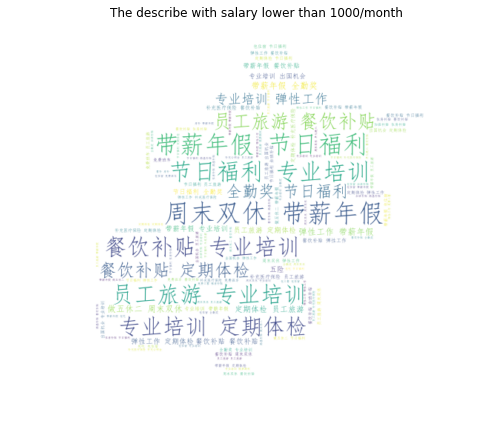

In [39]:
plt.figure(figsize=(8,8))
plt.imshow(describe_low_word, interpolation='bilinear')
plt.title("The describe with salary lower than 1000/month")
plt.axis("off")
plt.savefig("Describe_low.png")

#### require

In [40]:
stopwords = set(STOPWORDS)
stopwords.add("招1人")
stopwords.add("招2人")
stopwords.add("招3人")
stopwords.add("招5人")
stopwords.add("招若干人")
stopwords.add("12发布")
stopwords.add("11发布")
stopwords.add("北京")

In [41]:
require_txt_high=",".join([",".join(str(x).lstrip("['").rstrip("']").split("\\xa0\\xa0|\\xa0\\xa0")) 
                           for x in df[df["salary_mean"]>20000]["Require"].tolist()])

require_txt_low=",".join([",".join(str(x).lstrip("['").rstrip("']").split("\\xa0\\xa0|\\xa0\\xa0")) 
                           for x in df[df["salary_mean"]<=10000]["Require"].tolist()])

In [42]:
require_high_word = WordCloud(font_path=font,stopwords=stopwords,
                     mask=picture,max_words=200,max_font_size=80,
                      background_color='white',random_state=42,
                     width=3000,height=2000,).generate(require_txt_high)

In [43]:
require_low_word = WordCloud(font_path=font,stopwords=stopwords,
                     mask=picture,max_words=200,max_font_size=80,
                      background_color='white',random_state=42,
                     width=3000,height=2000,).generate(require_txt_low)

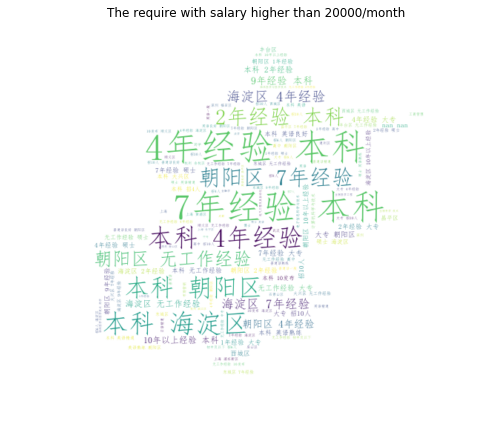

In [44]:
plt.figure(figsize=(8,8))
plt.imshow(require_high_word, interpolation='bilinear')
plt.title("The require with salary higher than 20000/month")
plt.axis("off")
plt.savefig("Require_high.png")

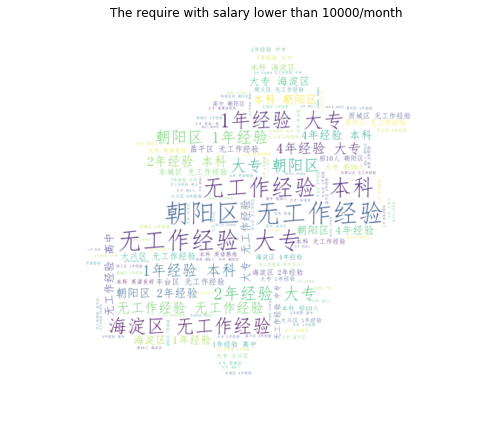

In [45]:
plt.figure(figsize=(8,8))
plt.imshow(require_low_word, interpolation='bilinear')
plt.title("The require with salary lower than 10000/month")
plt.axis("off")
plt.savefig("Require_low.png")

### Try machine learning

According to the type of work to predict if it can have salary higher than 30000 per month

In [46]:
# send a list with dupicate itme, return the list contains most occuray itme. the number of return items can be define.
from collections import Counter
def get_list(desire_list,num):
    c=Counter(desire_list)
    def delete_word(word):
        B_R=str(word)!="nan" and str(word)!="" and not str(word).startswith("北京") and not str(word).startswith("01-") and not str(word).startswith("招") and not str(word).startswith("五险")
        return B_R
        
    return [c.most_common(num)[i][0] for i in range(num) if delete_word(c.most_common(num)[i][0])]

In [47]:
def add_column(list_to_columns,from_columns):
    for item in list_to_columns:
        df_model[item]=df[from_columns].str.contains(item)
        df_model[item].replace(np.nan,False,inplace=True)

In [48]:
df_model = pd.DataFrame()
add_column(get_list(type_list,100),"type")
# add_column(get_list(describe_list,1000),"Describe")
# add_column(get_list(require_list,1000),"Require")

In [49]:
df_model.shape

(73939, 97)

In this case, we would not concern if high salary grater than 100000

### Model

In [50]:
df_target = pd.DataFrame()

It is not meaningful if we predict the accurate salary. Which will be more helpful if we predict salary level

In [51]:
df["salary_mean"].describe()

count     73939.000000
mean      11126.097736
std        8251.330109
min        1000.000000
25%        6500.000000
50%        9000.000000
75%       12500.000000
max      450000.000000
Name: salary_mean, dtype: float64

(0, 100000)

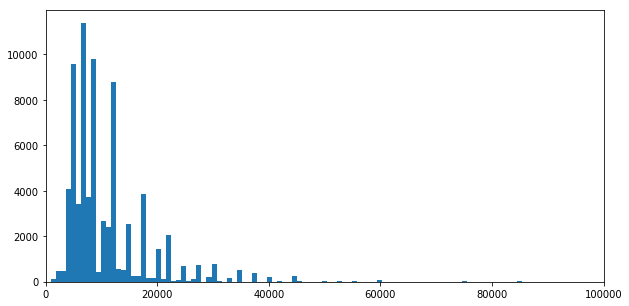

In [52]:
plt.figure(figsize=(10,5))
plt.hist(df["salary_mean"],bins=500)
plt.xlim(0,100000)

In [53]:
salary_category=[1 if x>30000 else 0 for x in df["salary_mean"]]

In [54]:
df_target["salary"]=salary_category

In [55]:
df_target.head()

,salary
0,0
1,0
2,0
3,0
4,0


#### encode

In [56]:
from sklearn.preprocessing import OneHotEncoder
encoder = OneHotEncoder() 

In [57]:
X=encoder.fit_transform(df_model).toarray()

C:\Software\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:368: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [58]:
X.shape

(73939, 194)

In [59]:
# y=encoder.fit_transform(df_target).toarray()
y=df_target["salary"].values

In [60]:
y.shape

(73939,)

#### Train, test set split

In [61]:
from sklearn.model_selection import train_test_split
train_X, test_X,train_y,test_y = train_test_split(X,y,test_size=0.3, random_state=42)

In [62]:
print(train_X.shape,test_X.shape,train_y.shape,test_y.shape)

(51757, 194) (22182, 194) (51757,) (22182,)


#### Random Forest

In [63]:
from sklearn.ensemble import RandomForestClassifier
forest_clf = RandomForestClassifier() 
forest_clf.fit(train_X, train_y)

C:\Software\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [64]:
forest_clf.predict(test_X)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [65]:
from sklearn.model_selection import cross_val_score 
cross_val_score(forest_clf, train_X, train_y, cv=3, scoring="accuracy")

array([0.97206283, 0.97206121, 0.97287271])

####  It seems amazing that we got 97% accuray,

#### Calm down, let's valid if it is really good or not

In [66]:
from sklearn.model_selection import cross_val_predict
predict=cross_val_predict(forest_clf, train_X, train_y, cv=3)

In [67]:
from sklearn.metrics import confusion_matrix
conf_mx=confusion_matrix(train_y, predict,labels=[ 0,1])

In [68]:
conf_mx.view()

array([[50304,    55],
       [ 1370,    28]], dtype=int64)

In [69]:
cross_val_score(forest_clf, train_X, train_y, cv=3, scoring="balanced_accuracy")

array([0.50491803, 0.51430658, 0.50935879])

only 50%

### It is not good at all, the result shows the algorthom seems throw all items into lower than 30000.

### Tune model

### Improve by parameters

We should calculate by balanced accuracy

In [70]:
from sklearn.model_selection import GridSearchCV 
param_grid = [ {'n_estimators': [10, 20, 100],
                'criterion': ["gini", "entropy"],
                'max_features': ["auto", "log2"]}, 
              {'bootstrap': [False,True], 'min_samples_leaf': [1,2,4,10],'class_weight':["balanced_subsample","balanced"]}] 
forest_clf = RandomForestClassifier()
grid_search = GridSearchCV(forest_clf, param_grid, cv=3, scoring='balanced_accuracy')
grid_search.fit(train_X, train_y)

C:\Software\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Software\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Software\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Software\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Software\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: T

C:\Software\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Software\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Software\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Software\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
C:\Software\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:246: FutureWarning: T

GridSearchCV(cv=3, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'n_estimators': [10, 20, 100], 'criterion': ['gini', 'entropy'], 'max_features': ['auto', 'log2']}, {'bootstrap': [False, True], 'min_samples_leaf': [1, 2, 4, 10], 'class_weight': ['balanced_subsample', 'balanced']}],
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring='balanced_accuracy', verbose=0)

In [71]:
grid_search.best_estimator_

RandomForestClassifier(bootstrap=False, class_weight='balanced_subsample',
            criterion='gini', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_decrease=0.0,
            min_impurity_split=None, min_samples_leaf=10,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=10, n_jobs=None, oob_score=False,
            random_state=None, verbose=0, warm_start=False)

In [72]:
grid_search.best_params_

{'bootstrap': False,
 'class_weight': 'balanced_subsample',
 'min_samples_leaf': 10}

In [73]:
cvres = grid_search.cv_results_ 
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]): 
    print(mean_score, params)

0.5091303062533424 {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 10}
0.5102132585361543 {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 20}
0.5085441480230719 {'criterion': 'gini', 'max_features': 'auto', 'n_estimators': 100}
0.5092296762841789 {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 10}
0.5095674658105903 {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 20}
0.507868527620583 {'criterion': 'gini', 'max_features': 'log2', 'n_estimators': 100}
0.5095575370774399 {'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 10}
0.5099846641199851 {'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 20}
0.5089017948560247 {'criterion': 'entropy', 'max_features': 'auto', 'n_estimators': 100}
0.5099151424009669 {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 10}
0.508732944487788 {'criterion': 'entropy', 'max_features': 'log2', 'n_estimators': 20}
0.5088620177631282 {'criterion': 'entropy', 'max_

In [74]:
final_model=grid_search.best_estimator_

In [75]:
cross_val_score(final_model, train_X, train_y, cv=3, scoring="accuracy")

array([0.61148786, 0.58949687, 0.59424994])

#### Although the accuracy seems awlful. We improved the balanced accuracy to 70%

In [76]:
cross_val_score(final_model, train_X, train_y, cv=3, scoring="balanced_accuracy")

array([0.71895321, 0.72872499, 0.72958561])

In [77]:
predict_final=cross_val_predict(final_model, train_X, train_y, cv=3)

In [78]:
confusion_matrix(train_y, predict_final,labels=[ 0,1])

array([[29842, 20517],
       [  194,  1204]], dtype=int64)

In [79]:
confusion_matrix(train_y, predict_final,labels=[ 0,1])/confusion_matrix(train_y, predict_final,labels=[ 0,1]).sum(axis=1, keepdims=True)

array([[0.59258524, 0.40741476],
       [0.13876967, 0.86123033]])

### Improve by thresholder

In [80]:
predict_prob = cross_val_predict(final_model, train_X, train_y,cv=3,method="predict_proba")

In [81]:
predict_prob
predict_prob = predict_prob[:, 1]

In [82]:
predict_prob

array([0.        , 0.1145841 , 0.94432911, ..., 0.55238531, 0.57664648,
       0.57664648])

In [83]:
train_y

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [84]:
from sklearn.metrics import roc_curve
fpr_forest, tpr_forest, thresholds_forest = roc_curve(train_y,predict_prob)

In [85]:
def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label) 
    plt.plot([0, 1], [0, 1], 'k--') 
    plt.axis([0, 1, 0, 1]) 
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')

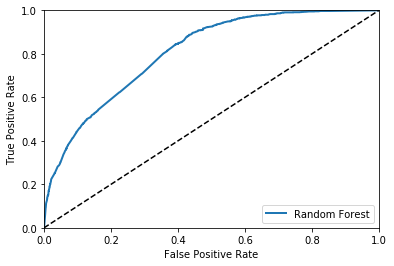

In [86]:
plot_roc_curve(fpr_forest, tpr_forest, "Random Forest")
plt.legend(loc="lower right")
plt.show()

#### ROC plot shows the awlful predict as well

#### If we change thresholder to 0.56 , we can get more jobs have 70% accurate for both

In [87]:
new_cm=confusion_matrix(train_y, np.array([1 if x>0.56 else 0 for x in predict_prob]),labels=[ 0,1])
new_cm

array([[35640, 14719],
       [  407,   991]], dtype=int64)

In [88]:
row_sums=new_cm.sum(axis=1, keepdims=True)

In [89]:
new_cm/row_sums

array([[0.70771858, 0.29228142],
       [0.29113019, 0.70886981]])

### On test

In [90]:
predict_test=final_model.predict_proba(test_X)
predict_test=predict_test[:,1]

In [91]:
test_cm=confusion_matrix(test_y, np.array([1 if x>0.56 else 0 for x in predict_test]),labels=[ 0,1])
test_cm

array([[13993,  7606],
       [  102,   481]], dtype=int64)

In [92]:
test_cm/test_cm.sum(axis=1, keepdims=True)

array([[0.64785407, 0.35214593],
       [0.17495712, 0.82504288]])

### Association

#### Type

In [93]:
from mlxtend.frequent_patterns import apriori
frequent_itemsets=apriori(df_model, min_support=0.01,use_colnames=True)
frequent_itemsets[frequent_itemsets.itemsets.apply(lambda x: len(x)) >= 3]

,support,itemsets
173,0.030079,"(销售代表, 销售, 电话销售)"
174,0.015121,"(销售代表, 大客户销售, 销售)"
175,0.015242,"(销售代表, 销售, 渠道销售)"
176,0.019097,"(销售代表, 销售, 渠道)"
177,0.011604,"(销售代表, 销售, 直销销售)"
178,0.013985,"(销售代表, 销售, 客户代表)"
179,0.012362,"(销售代表, 培训, 销售)"
180,0.017352,"(销售代表, 销售, 专员)"
181,0.015553,"(销售代表, 经理, 销售)"
182,0.015242,"(销售代表, 渠道, 渠道销售)"


In [94]:
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(销售代表),(销售),0.097175,0.236357,0.097175,1.000000,4.230888,0.074207,inf
1,(行政专员),(助理),0.031851,0.136599,0.028591,0.897665,6.571527,0.024240,8.436967
2,(客服专员),(助理),0.021707,0.136599,0.019935,0.918380,6.723179,0.016970,10.578309
3,(文员),(助理),0.020071,0.136599,0.017420,0.867925,6.353809,0.014678,6.537178
4,(销售助理),(助理),0.012078,0.136599,0.012078,1.000000,7.320693,0.010428,inf
5,(秘书),(助理),0.011618,0.136599,0.011009,0.947614,6.937188,0.009422,16.481364
6,(经理助理),(助理),0.013227,0.136599,0.013227,1.000000,7.320693,0.011420,inf
7,(电话销售),(销售),0.050312,0.236357,0.050312,1.000000,4.230888,0.038420,inf
8,(销售主管),(主管),0.012740,0.127416,0.012740,1.000000,7.848318,0.011117,inf
9,(销售经理),(销售),0.044374,0.236357,0.044374,1.000000,4.230888,0.033886,inf


#### Describe

In [95]:
df_model = pd.DataFrame()
add_column(get_list(describe_list,1000),"Describe")

In [96]:
frequent_itemsets=apriori(df_model, min_support=0.02,use_colnames=True)
frequent_itemsets[frequent_itemsets.itemsets.apply(lambda x: len(x)) >= 2]

,support,itemsets
54,0.278108,"(绩效奖金, 专业培训)"
55,0.218870,"(绩效奖金, 年终奖金)"
56,0.196121,"(绩效奖金, 餐饮补贴)"
57,0.167665,"(定期体检, 绩效奖金)"
58,0.166150,"(绩效奖金, 带薪年假)"
59,0.174495,"(员工旅游, 绩效奖金)"
60,0.158009,"(绩效奖金, 节日福利)"
61,0.156250,"(通讯补贴, 绩效奖金)"
62,0.154411,"(绩效奖金, 弹性工作)"
63,0.140494,"(绩效奖金, 交通补贴)"


In [97]:
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.8)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(奖金),(绩效奖金),0.603497,0.496788,0.496788,0.823181,1.657008,0.196978,2.845923
1,(绩效奖金),(奖金),0.496788,0.603497,0.496788,1.000000,1.657008,0.196978,inf
2,(专业培训),(奖金),0.379434,0.603497,0.320088,0.843593,1.397840,0.091100,2.535068
3,(年终奖),(年终奖金),0.324632,0.323578,0.323578,0.996750,3.080407,0.218534,208.156003
4,(年终奖金),(年终奖),0.323578,0.324632,0.323578,1.000000,3.080407,0.218534,inf
5,(年终奖金),(奖金),0.323578,0.603497,0.323578,1.000000,1.657008,0.128299,inf
6,(体检),(定期体检),0.276431,0.269776,0.269776,0.975928,3.617545,0.195202,30.335446
7,(定期体检),(体检),0.269776,0.276431,0.269776,1.000000,3.617545,0.195202,inf
8,(定期体检),(奖金),0.269776,0.603497,0.225497,0.835865,1.385035,0.062687,2.415710
9,(带薪年假),(年假),0.264583,0.266977,0.264583,1.000000,3.745643,0.193945,inf


#### require

In [98]:
df_model = pd.DataFrame()
add_column(get_list(require_list,100),"Require")

In [99]:
frequent_itemsets=apriori(df_model, min_support=0.01,use_colnames=True)
frequent_itemsets[frequent_itemsets.itemsets.apply(lambda x: len(x)) >= 2]

,support,itemsets
20,0.099055,"(无工作经验, 本科)"
21,0.106493,"(无工作经验, 大专)"
22,0.021288,"(无工作经验, 高中)"
23,0.015973,"(中专, 无工作经验)"
24,0.027158,"(无工作经验, 英语)"
25,0.018015,"(无工作经验, 普通话)"
26,0.014850,"(无工作经验, 良好)"
27,0.084015,"(3-4年经验, 本科)"
28,0.040844,"(本科, 1年经验)"
29,0.054504,"(2年经验, 本科)"


In [100]:
from mlxtend.frequent_patterns import association_rules
association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction
0,(5-7年经验),(本科),0.074318,0.339604,0.047647,0.641128,1.887869,0.022409,1.840200
1,(英语熟练),(本科),0.029457,0.339604,0.020490,0.695592,2.048244,0.010486,2.169445
2,(英语),(本科),0.093428,0.339604,0.057020,0.610307,1.797112,0.025291,1.694656
3,(英语良好),(英语),0.033271,0.093428,0.033271,1.000000,10.703387,0.030162,inf
4,(良好),(英语良好),0.049379,0.033271,0.033271,0.673788,20.251712,0.031628,2.963500
5,(英语良好),(良好),0.033271,0.049379,0.033271,1.000000,20.251712,0.031628,inf
6,(英语熟练),(英语),0.029457,0.093428,0.029457,1.000000,10.703387,0.026705,inf
7,(普通话熟练),(普通话),0.015946,0.049690,0.015946,1.000000,20.124932,0.015153,inf
8,(普通话良好),(普通话),0.013687,0.049690,0.013687,1.000000,20.124932,0.013007,inf
9,(普通话良好),(良好),0.013687,0.049379,0.013687,1.000000,20.251712,0.013011,inf
